In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [60]:
housing = pd.read_csv('Housing.csv')
# print(data.head())
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [61]:
data.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,135.471560,1.965138,0.286239,0.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.069725
std,1.870440e+06,76.059693,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,71.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,130.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,196.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,283.000000,5.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [62]:
housing.shape

(545, 13)

In [63]:
print("House information\n")
housing.info()

House information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [64]:
housing.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [65]:
print(housing.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


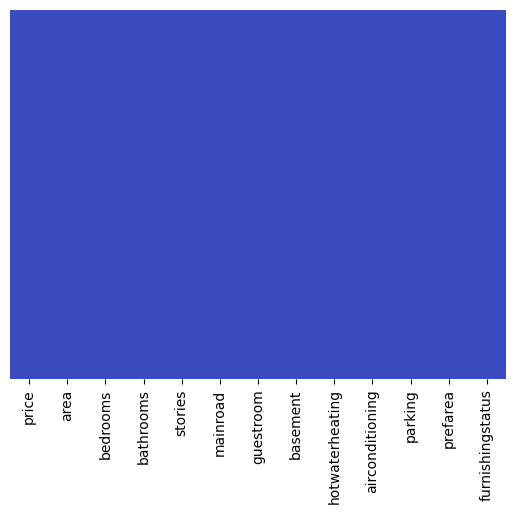

In [66]:
sns.heatmap(housing.isnull(), yticklabels=False, cbar=False, cmap='coolwarm')
plt.show()

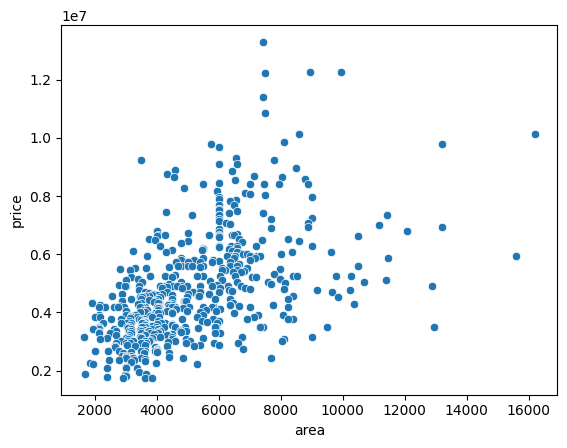

In [67]:
sns.scatterplot(x='area', y='price', data=housing)
plt.show()

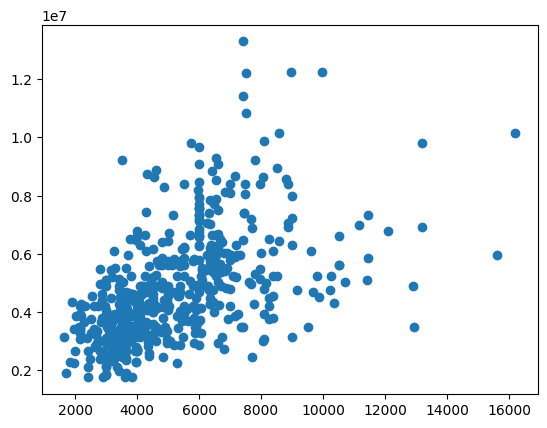

In [68]:
plt.scatter(housing['area'], housing['price'])

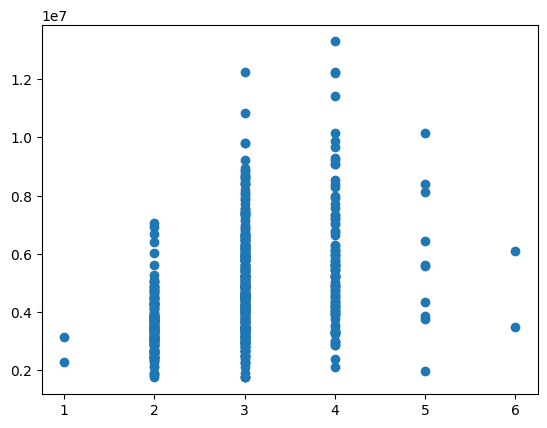

In [69]:
plt.scatter(housing['bedrooms'], housing['price'])

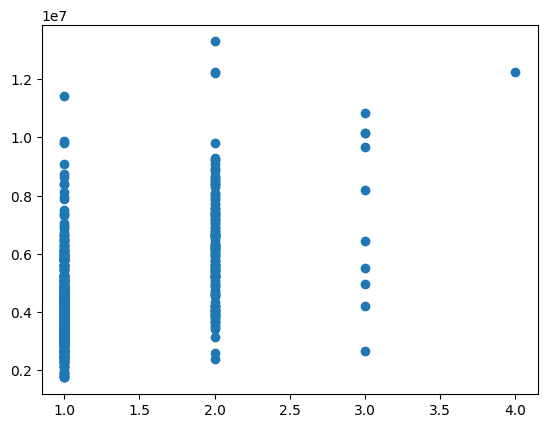

In [70]:
plt.scatter(housing['bathrooms'], housing['price'])


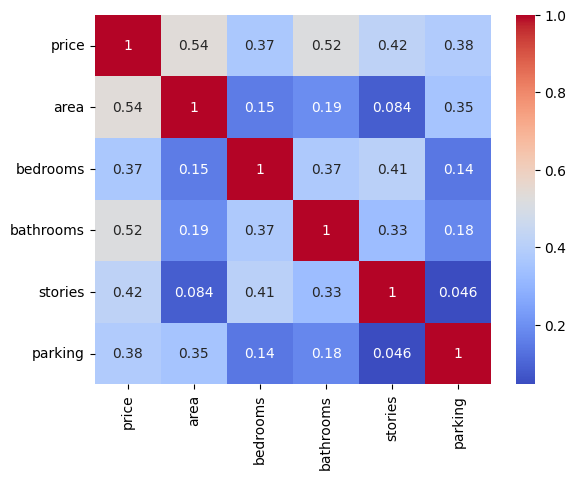

In [71]:
# The code selects only the numeric columns from the DataFrame using housing.select_dtypes(include=['number']). This ensures that only numeric data is passed to the corr() method.
numeric_housing = housing.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_housing.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

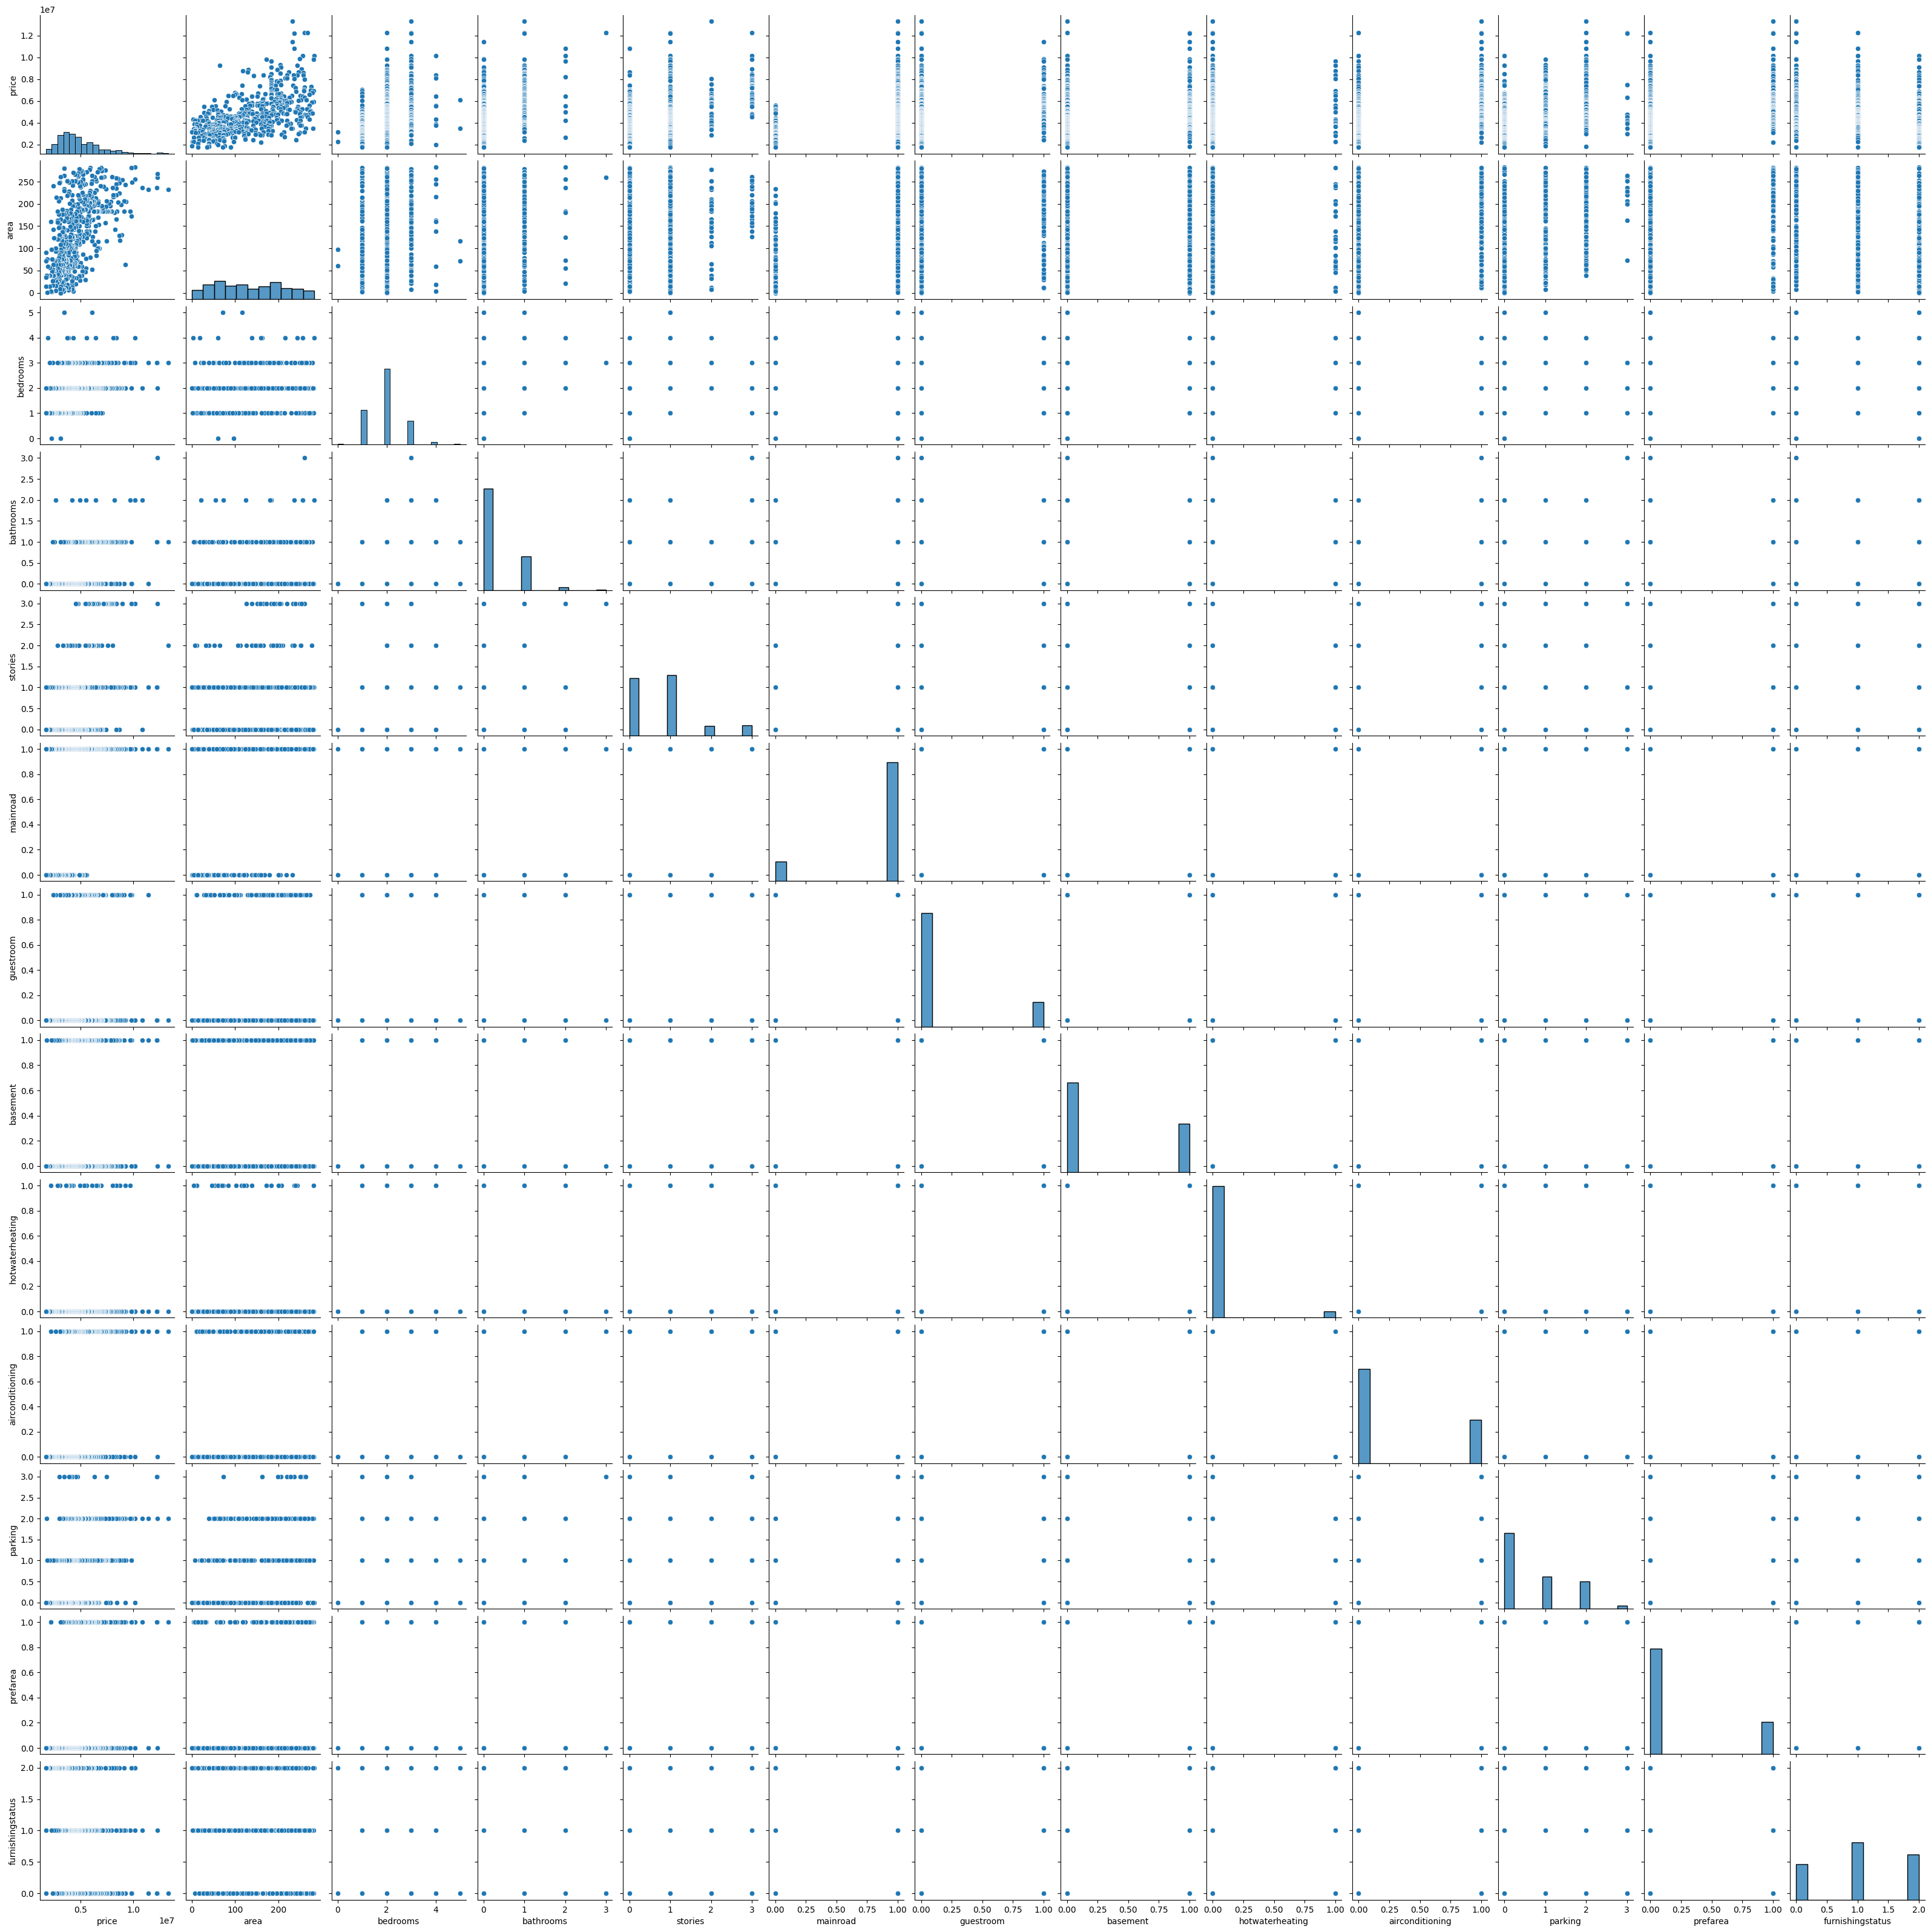

In [72]:
sns.pairplot(data)
plt.show()

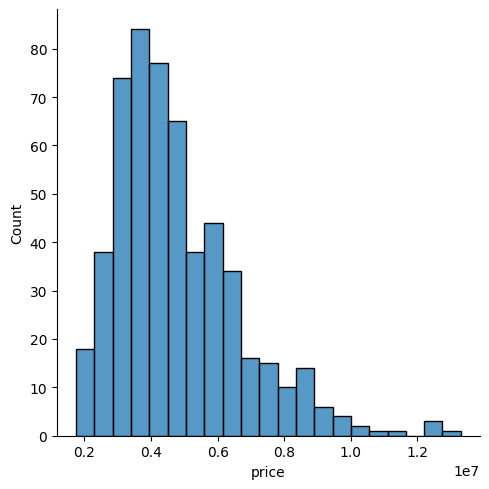

In [73]:
sns.displot(housing['price'])

In [74]:
# Encode categorical variables using LabelEncoder
label_encoders = {}
# categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
#                        'airconditioning', 'prefarea', 'furnishingstatus']

categorical_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']

for column in categorical_columns:
    levelEncoder = LabelEncoder()
    data[column] = levelEncoder.fit_transform(data[column])
    label_encoders[column] = levelEncoder

print(data.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000   232         3          1        2         1          0   
1  12250000   260         3          3        3         1          0   
2  12250000   268         2          1        1         1          0   
3  12215000   237         3          1        1         1          0   
4  11410000   232         3          0        1         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  
0                 0  
1                 0  
2                 1  
3                 0  
4                 0  


In [75]:
X = data.drop('price', axis=1)
y = data['price']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [77]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [78]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 1238308924748.918
R2 Score: 0.6205132034151162


In [79]:
Prediction = model.predict(X_test)

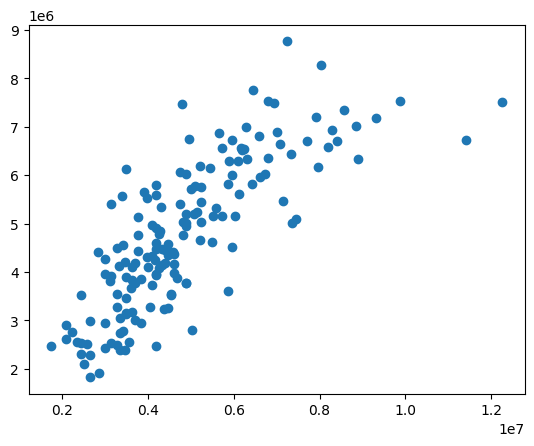

In [80]:
plt.scatter(y_test, Prediction)

In [81]:
import joblib
joblib.dump(model, 'House_Price_prediction.pkl')

['House_Price_prediction.pkl']

In [82]:
import numpy as np

# Load the model
model = joblib.load('House_Price_prediction.pkl')

# Example: Predict the price of a house with given features
# [area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus]
test_data = np.array([
    [12000, 5, 4, 3, 1, 1, 1, 0, 1, 3, 2, 2],  # Example 1
    [4500, 2, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1],   # Example 2
    [6000, 3, 2, 2, 1, 0, 1, 1, 1, 1, 1, 0],   # Example 3
    [10000, 4, 3, 2, 1, 1, 0, 0, 1, 2, 2, 2],  # Example 4
    [8000, 3, 2, 2, 0, 1, 0, 1, 0, 2, 1, 1]    # Example 5
])

predicted_prices = model.predict(test_data)

# Print the predicted prices
for i, price in enumerate(predicted_prices):
    print(f'Predicted Price for Example {i + 1}: {price}')

Predicted Price for Example 1: 108524183.46746618
Predicted Price for Example 2: 40890071.43966051
Predicted Price for Example 3: 57420204.588953085
Predicted Price for Example 4: 90059851.08095689
Predicted Price for Example 5: 72200722.59388177


c:\Users\Kawsar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


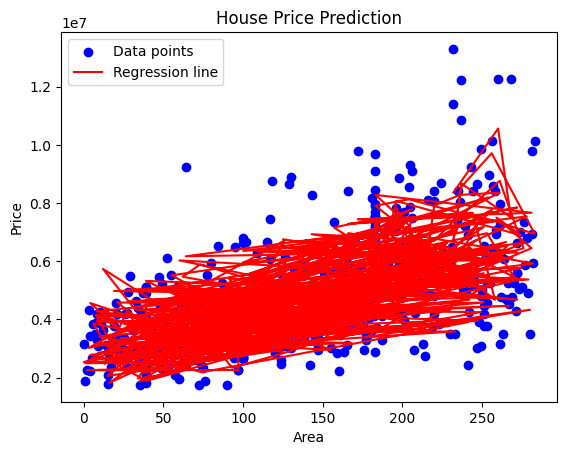

In [83]:
# Plotting the data points
plt.scatter(data['area'], data['price'], color='blue', label='Data points')

# Plotting the regression line
plt.plot(data['area'], model.predict(data.drop('price', axis=1)), color='red', label='Regression line')

plt.xlabel('Area')
plt.ylabel('Price')
plt.title('House Price Prediction')
plt.legend()
plt.show()

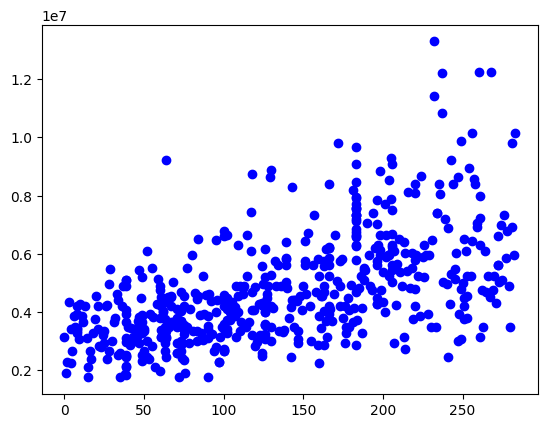

In [84]:
plt.scatter(data['area'], data['price'], color='blue', label='Data points')

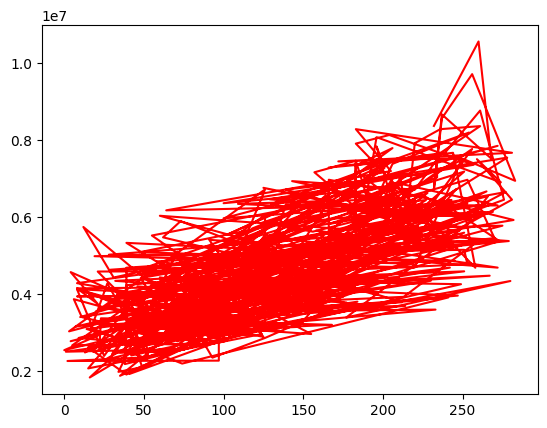

In [85]:
plt.plot(data['area'], model.predict(data.drop('price', axis=1)), color='red', label='Regression line')

In [86]:
accuracy = model.score(X_test, y_test)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

Model Accuracy: 62.05%
